# **Proyecto ML sobre vinos**

*Crear un modelo de regresion multivariable.*



# Inicio

En primer lugar, vamos a importar algunos módulos comunes, asegurarnos de que MatplotLib traza las figuras correctamente y preparar una función para guardar las figuras. También comprobamos que Python 3.5 o posterior está instalado (aunque Python 2.x puede funcionar, está obsoleto por lo que es **altamente** recomendable utilizar Python 3 en su lugar), así como Scikit-Learn ≥0.20.

In [1]:
# Se requiere Python ≥ 3.5
import sys;
assert sys.version_info >= (3, 5);

# Se requiere Scikit-Learn ≥ 0.20
import sklearn;
assert sklearn.__version__ >= "0.20";

# Otros imports
import numpy as np;
import os;

# la línea que sigue, sólo en Colab ...
# %matplotlib inline

import matplotlib as mpl;
import matplotlib.pyplot as plt;

# tamaño del texto en las etiquetas por defecto
mpl.rc('axes',  labelsize=14);
mpl.rc('xtick', labelsize=12);
mpl.rc('ytick', labelsize=12);



# Obteniendo los datos

## Descargando los datos

In [2]:
import os;
import tarfile;
import urllib.request;

WINE_PATH = os.path.join("datasets", "winequality");


In [3]:
import pandas as pd

def load_wine_data(wine_path):
    csv_path = os.path.join(wine_path, "winequality.csv")
    print("Leyendo", csv_path)
    return pd.read_csv(csv_path)



## Primer acercamiento a la estructura de los datos

In [4]:
rwine = load_wine_data(WINE_PATH)
rwine.head()


Leyendo datasets\winequality\winequality.csv


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [5]:

rwine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [6]:
rwine["quality"].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [7]:
rwine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


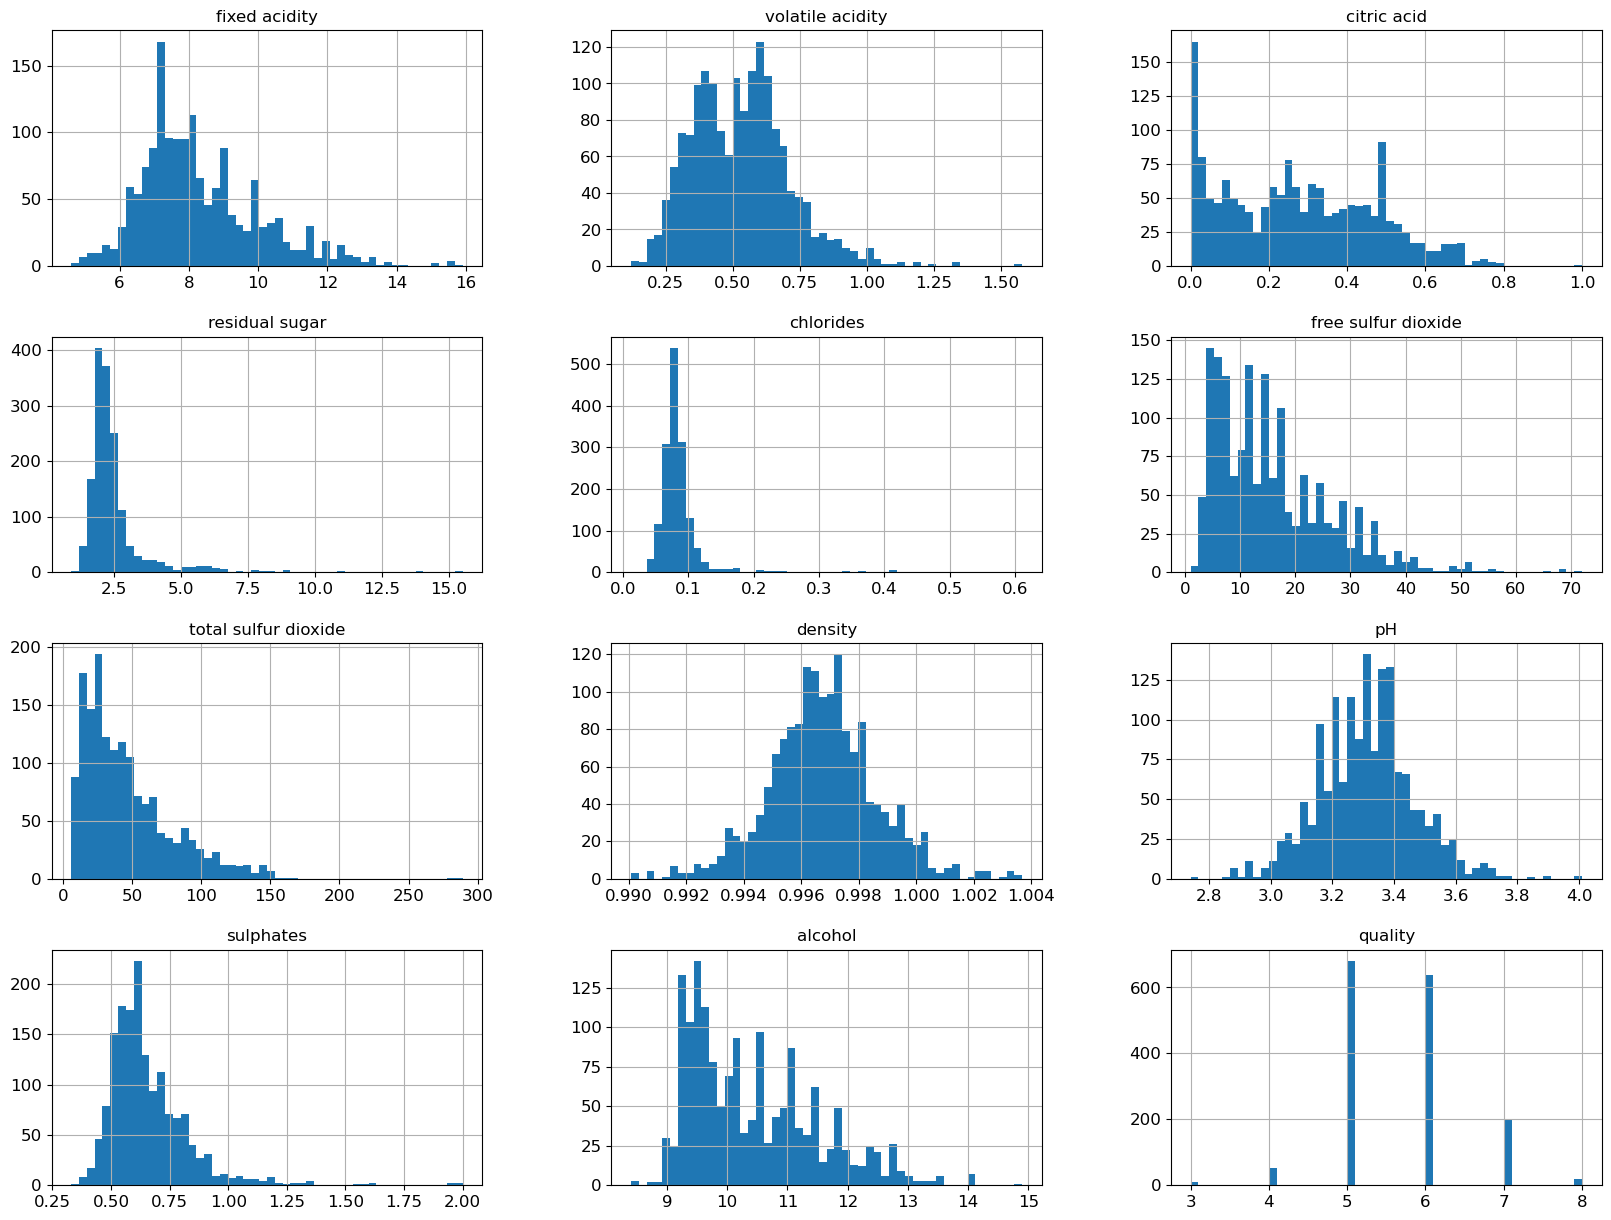

In [8]:
rwine.hist(bins=50, figsize =(20,15))
plt.show()

# Descubrir y visualizar los datos para obtener información

---



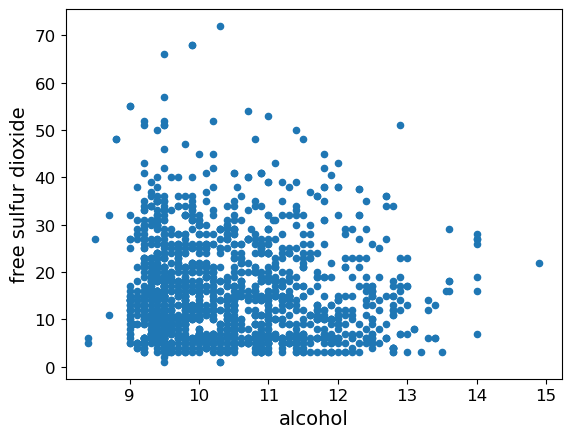

In [9]:
rwine.plot(kind="scatter", x="alcohol", y="free sulfur dioxide");


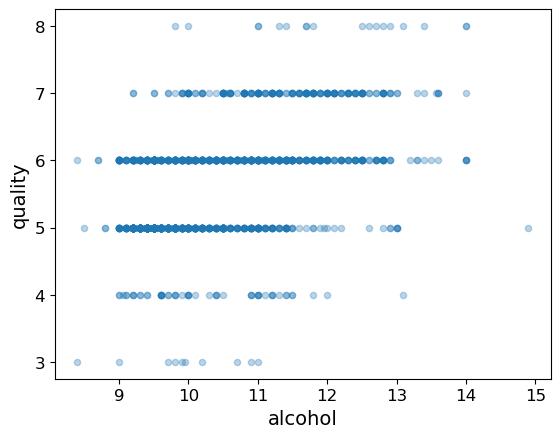

In [10]:
rwine.plot(kind="scatter", x="alcohol", y="quality", alpha=0.3);


## Buscando correlaciones

In [12]:
corr_matrix = rwine.corr()
corr_matrix

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


In [13]:
corr_matrix["quality"].sort_values(ascending=False)

quality                 1.000000
alcohol                 0.476166
sulphates               0.251397
citric acid             0.226373
fixed acidity           0.124052
residual sugar          0.013732
free sulfur dioxide    -0.050656
pH                     -0.057731
chlorides              -0.128907
density                -0.174919
total sulfur dioxide   -0.185100
volatile acidity       -0.390558
Name: quality, dtype: float64

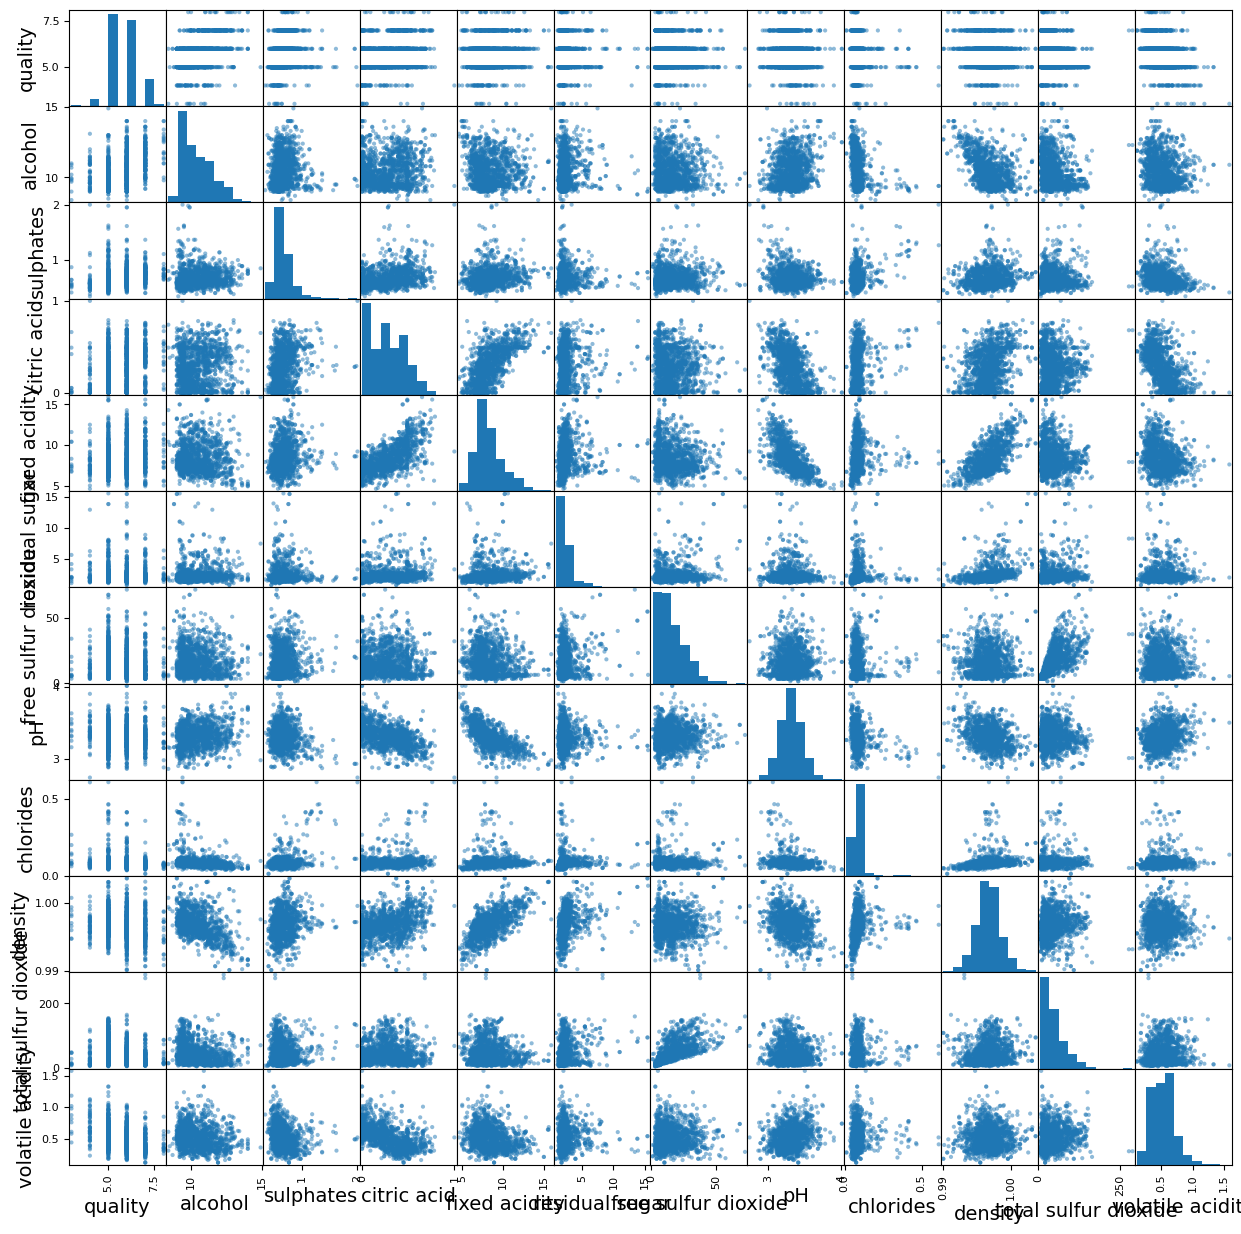

In [17]:
from pandas.plotting import scatter_matrix;

attributes = ["quality", "alcohol", "sulphates", "citric acid", "fixed acidity", "residual sugar", "free sulfur dioxide", "pH", "chlorides", "density", "total sulfur dioxide", "volatile acidity"];

scatter_matrix(rwine[attributes], figsize=(15,15) );

# Seleccionando y entrenando los modelos

## Creamos el Train y Test Set

In [18]:
# plantamos una semilla
np.random.seed(42)




In [21]:


def split_train_test(data, test_ratio):
    test_set_size  =int(len(rwine)*test_ratio)
    shuffle_indices=np.random.permutation(len(data))
    test_indices   =shuffle_indices[:test_set_size]
    train_indices  =shuffle_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]
    




In [22]:

X_train, X_test = split_train_test(rwine, 0.20)
len(X_train), len(X_test)

(1280, 319)

In [23]:
y_train = X_train["quality"].copy()

X_train = X_train.drop("quality", axis=1)

In [24]:

y_train


704     4
493     6
354     6
342     6
834     5
       ..
1130    6
1294    6
860     5
1459    7
1126    6
Name: quality, Length: 1280, dtype: int64

## Entrenando y evaluando

In [26]:


from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)



LinearRegression()

Generamos las prediciones y las comparamos con los valores reales (sólo 10):

In [27]:
some_data = X_train.iloc[:5]
pred = lin_reg.predict(some_data)
pred





array([5.19060076, 5.68688284, 6.06333211, 5.6911026 , 5.10925725])

Error cuadrático medio:
$$ MSE = \frac{1}{n}∑_{i=1}^{n}{(y_i-y_i')}^2 $$

In [28]:


from sklearn.metrics import mean_squared_error

predictions = lin_reg.predict(X_train)
lin_mse = mean_squared_error(y_train, predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse




0.6518997030231612

Error absoluto medio:
$$ MAE = \frac{1}{n}∑_{i=1}^{n}{|y_i-y_i'|} $$

In [29]:


from sklearn.metrics import mean_absolute_error

#predictions = lin_reg.predict(X_train)
lin_mae = mean_absolute_error(y_train, predictions)
lin_mae



0.5000306156332442

In [30]:


from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor()
tree_reg.fit(X_train, y_train)



DecisionTreeRegressor()

In [31]:

predictions = tree_reg.predict(X_train)
tree_mse = mean_squared_error(y_train, predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse



0.0

## Mejorando la evaluación por medio de la validación cruzada >>>>>>> ESTE ES EL MODELO A SEGUIR


In [32]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree_reg, X_train, y_train, scoring = "neg_mean_squared_error", cv = 10)
tree_rmse_scores = np.sqrt(-scores)
tree_rmse_scores


array([0.72348981, 0.91429618, 0.76546554, 0.64347688, 0.85238636,
       0.86150305, 0.66143783, 0.8291562 , 0.66143783, 0.833854  ])

In [33]:
def display_scores(scores):
    print(f"Scores: {scores}")
    print(f"Mean:   {scores.mean()}")
    print(f"Standard deviation:    {scores.std()}")
    
display_scores(tree_rmse_scores)



Scores: [0.72348981 0.91429618 0.76546554 0.64347688 0.85238636 0.86150305
 0.66143783 0.8291562  0.66143783 0.833854  ]
Mean:   0.7746503672447602
Standard deviation:    0.09225268845707436


In [34]:
scores = cross_val_score(lin_reg, X_train, y_train, scoring = "neg_mean_squared_error", cv = 10)
lin_rmse_scores = np.sqrt(-scores)
lin_rmse_scores



array([0.63141683, 0.71610805, 0.69485564, 0.70131741, 0.67533219,
       0.67753091, 0.66678337, 0.67898489, 0.49611698, 0.64555385])

In [35]:
def display_scores(scores):
    print(f"Scores: {scores}")
    print(f"Mean:   {scores.mean()}")
    print(f"Standard deviation:    {scores.std()}")
    
display_scores(tree_rmse_scores)

Scores: [0.72348981 0.91429618 0.76546554 0.64347688 0.85238636 0.86150305
 0.66143783 0.8291562  0.66143783 0.833854  ]
Mean:   0.7746503672447602
Standard deviation:    0.09225268845707436


**Note**: we specify `n_estimators=100` to be future-proof since the default value is going to change to 100 in Scikit-Learn 0.22 (for simplicity, this is not shown in the book).

In [36]:

from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(n_estimators = 100, random_state=42)

forest_reg.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [37]:
predictions = forest_reg.predict(X_train)
forest_mse = mean_squared_error(y_train, predictions)
forest_rmse = np.sqrt(forest_mse)
forest_rmse




0.22131708022653832

In [38]:

forest_scores = cross_val_score(forest_reg, X_train, y_train, scoring="neg_mean_squared_error", cv= 10)

forest_rmse_scores =  np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)


Scores: [0.61256632 0.67057927 0.6264134  0.56864834 0.6028675  0.61451327
 0.54718812 0.66846372 0.44928763 0.56816591]
Mean:   0.5928693498734761
Standard deviation:    0.06142828323013688


In [39]:

from sklearn.svm import SVR

svm_reg = SVR(kernel="linear")
svm_reg.fit(X_train, y_train)
predictions=svm_reg.predict(X_train)
svm_rmse=mean_squared_error(y_train, predictions)
svm_rmse.sqrt(svm_rmse)
svm_rmse


AttributeError: 'numpy.float64' object has no attribute 'sqrt'

In [75]:


svm_scores = cross_val_score(svm_reg, X_train, y_train, scoring="neg_mean_squared_error", cv= 10)

svm_rmse_scores =  np.sqrt(-forest_scores)
display_scores(svm_rmse_scores)


92744.93979513664

In [ ]:
# "xgboost" algoritmo similar a random forest, pero 
# en vez de hacerlo en paralelo, lo hace en serie
# pasando la salida con la entrada del siguiente, 
# puliendo el resultado

import xgboost as xgb

xgb_reg = xgb.XGBRegressor(objetive= "reg:squarederror", random_state=42)

xgb_reg.fit(X_train, y_train)
predictions=xgb_reg.predict(X_train)
xgb_mse=mean_squared_error(y_train, predictions)
xgb_rmse=np.sqrt(xgb_mse)
xgb_mse

# Afinando el modelo

## Grid Search

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

The best hyperparameter combination found:

{'max_features': 6, 'n_estimators': 30}

RandomForestRegressor(max_features=6, n_estimators=30, random_state=42)

Let's look at the score of each hyperparameter combination tested during the grid search:

63728.2208722647 {'max_features': 2, 'n_estimators': 3}
54813.35330602952 {'max_features': 2, 'n_estimators': 10}
52752.95069867988 {'max_features': 2, 'n_estimators': 30}
60282.020030620006 {'max_features': 4, 'n_estimators': 3}
52069.58816826777 {'max_features': 4, 'n_estimators': 10}
49996.66634820523 {'max_features': 4, 'n_estimators': 30}
57664.81055654801 {'max_features': 6, 'n_estimators': 3}
51050.205113040036 {'max_features': 6, 'n_estimators': 10}
49429.06207254693 {'max_features': 6, 'n_estimators': 30}
58939.730723940556 {'max_features': 8, 'n_estimators': 3}
51937.858466760634 {'max_features': 8, 'n_estimators': 10}
49963.022989912846 {'max_features': 8, 'n_estimators': 30}
62071.820065186905 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
53968.60720856824 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
58006.2293367236 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
51477.19314637942 {'bootstrap': False, 'max_features': 3, 'n_estimators'

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,param_n_estimators,param_bootstrap,params,split0_test_score,split1_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.076192,0.003622,0.006693,0.000142,2,3,NaN,"{'max_features': 2, 'n_estimators': 3}",-3.908982e+09,-3.899592e+09,...,-4.061286e+09,1.777379e+08,18,-1.057447e+09,-1.090653e+09,-1.128368e+09,-1.098219e+09,-1.106787e+09,-1.096295e+09,2.316678e+07
1,0.245306,0.011282,0.015764,0.000255,2,10,NaN,"{'max_features': 2, 'n_estimators': 10}",-2.960710e+09,-2.935455e+09,...,-3.004504e+09,6.805345e+07,11,-5.471995e+08,-5.683057e+08,-5.951718e+08,-5.804626e+08,-5.783017e+08,-5.738883e+08,1.586912e+07
2,0.710110,0.001782,0.041154,0.000329,2,30,NaN,"{'max_features': 2, 'n_estimators': 30}",-2.779962e+09,-2.737927e+09,...,-2.782874e+09,5.167314e+07,9,-4.210153e+08,-4.397356e+08,-4.471757e+08,-4.368283e+08,-4.343039e+08,-4.358118e+08,8.564802e+06
3,0.118221,0.003369,0.006788,0.000140,4,3,NaN,"{'max_features': 4, 'n_estimators': 3}",-3.803232e+09,-3.633764e+09,...,-3.633922e+09,1.794084e+08,16,-9.786097e+08,-9.933370e+08,-9.703163e+08,-9.309320e+08,-9.359749e+08,-9.618340e+08,2.436981e+07
4,0.385036,0.005512,0.015911,0.000356,4,10,NaN,"{'max_features': 4, 'n_estimators': 10}",-2.702993e+09,-2.712584e+09,...,-2.711242e+09,3.187841e+07,8,-5.167354e+08,-4.989287e+08,-5.217442e+08,-5.204221e+08,-4.984938e+08,-5.112648e+08,1.038153e+07
5,1.140878,0.005952,0.042839,0.002432,4,30,NaN,"{'max_features': 4, 'n_estimators': 30}",-2.542403e+09,-2.466091e+09,...,-2.499667e+09,2.746410e+07,3,-3.964187e+08,-3.870600e+08,-3.933111e+08,-3.943452e+08,-3.825936e+08,-3.907457e+08,5.133447e+06
6,0.160819,0.004517,0.006895,0.000245,6,3,NaN,"{'max_features': 6, 'n_estimators': 3}",-3.267447e+09,-3.304500e+09,...,-3.325230e+09,9.536722e+07,12,-8.681918e+08,-8.698606e+08,-9.071344e+08,-9.006322e+08,-9.092800e+08,-8.910198e+08,1.818982e+07
7,0.526186,0.007083,0.015678,0.000233,6,10,NaN,"{'max_features': 6, 'n_estimators': 10}",-2.614423e+09,-2.580080e+09,...,-2.606123e+09,1.011460e+08,4,-5.006148e+08,-4.832834e+08,-4.998076e+08,-4.949099e+08,-4.879207e+08,-4.933073e+08,6.748555e+06
8,1.577791,0.007854,0.042907,0.002362,6,30,NaN,"{'max_features': 6, 'n_estimators': 30}",-2.456999e+09,-2.424495e+09,...,-2.443232e+09,4.205464e+07,1,-3.871882e+08,-3.818466e+08,-3.838786e+08,-3.831805e+08,-3.870269e+08,-3.846241e+08,2.130856e+06
9,0.208105,0.005337,0.006703,0.000102,8,3,NaN,"{'max_features': 8, 'n_estimators': 3}",-3.482778e+09,-3.528070e+09,...,-3.473892e+09,4.021940e+07,14,-8.873773e+08,-9.056113e+08,-9.163445e+08,-8.862451e+08,-9.079560e+08,-9.007068e+08,1.189925e+07


## Randomized Search

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
                   param_distributions={'max_features': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7fad41dc81c0>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7fad41dce1f0>},
                   random_state=42, scoring='neg_mean_squared_error')

49109.14791527485 {'max_features': 7, 'n_estimators': 180}
51593.09829433648 {'max_features': 5, 'n_estimators': 15}
50104.27354914674 {'max_features': 3, 'n_estimators': 72}
50557.67606385747 {'max_features': 5, 'n_estimators': 21}
49195.63731196165 {'max_features': 7, 'n_estimators': 122}
50128.098481866786 {'max_features': 3, 'n_estimators': 75}
49997.80581255347 {'max_features': 3, 'n_estimators': 88}
49443.04317531388 {'max_features': 5, 'n_estimators': 100}
49886.29807320597 {'max_features': 3, 'n_estimators': 150}
64774.860767984406 {'max_features': 5, 'n_estimators': 2}


# Evaluando el modelo con el Test Set

48931.11046491504

We can compute a 95% [confidence interval](https://es.wikipedia.org/wiki/Intervalo_de_confianza) for the test RMSE:

array([46742.26611832, 51026.14722653])

We could compute the interval manually like this:

(46742.266118322084, 51026.14722652882)

Alternatively, we could use a z-scores rather than t-scores:

(46742.923084145754, 51025.54540824693)